In [67]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dsetPath = '/home/pedro/datasets/ub_herbarium/occurrence.txt'

In [3]:
list(pd.read_table(dsetPath,nrows=100).columns)

['gbifID',
 'abstract',
 'accessRights',
 'accrualMethod',
 'accrualPeriodicity',
 'accrualPolicy',
 'alternative',
 'audience',
 'available',
 'bibliographicCitation',
 'conformsTo',
 'contributor',
 'coverage',
 'created',
 'creator',
 'date',
 'dateAccepted',
 'dateCopyrighted',
 'dateSubmitted',
 'description',
 'educationLevel',
 'extent',
 'format',
 'hasFormat',
 'hasPart',
 'hasVersion',
 'identifier',
 'instructionalMethod',
 'isFormatOf',
 'isPartOf',
 'isReferencedBy',
 'isReplacedBy',
 'isRequiredBy',
 'isVersionOf',
 'issued',
 'language',
 'license',
 'mediator',
 'medium',
 'modified',
 'provenance',
 'publisher',
 'references',
 'relation',
 'replaces',
 'requires',
 'rights',
 'rightsHolder',
 'source',
 'spatial',
 'subject',
 'tableOfContents',
 'temporal',
 'title',
 'type',
 'valid',
 'institutionID',
 'collectionID',
 'datasetID',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'ownerInstitutionCode',
 'basisOfRecord',
 'informationWithheld',
 'dataGeneral

In [504]:
cols = ['recordedBy', 'scientificName', 'family', 'genus', 'species','taxonRank', 
        'stateProvince', 'locality', 'municipality', 'countryCode','occurrenceRemarks',
        'decimalLatitude','decimalLongitude','issue','hasGeospatialIssues', 'hasCoordinate',
        'eventDate', 'identifiedBy',
        'kingdom', 'phylum', 'class', 'order', 'family', 'genus']
occs = pd.read_table(dsetPath, delimiter='\t', usecols=cols, low_memory=False)
occs.dropna(subset=['recordedBy','scientificName'], inplace=True)

In [505]:
occs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185301 entries, 0 to 185310
Data columns (total 22 columns):
recordedBy             185301 non-null object
occurrenceRemarks      140768 non-null object
eventDate              181254 non-null object
countryCode            185214 non-null object
stateProvince          174285 non-null object
municipality           135291 non-null object
locality               163029 non-null object
decimalLatitude        185301 non-null float64
decimalLongitude       185301 non-null float64
identifiedBy           148600 non-null object
scientificName         185301 non-null object
kingdom                185289 non-null object
phylum                 183257 non-null object
class                  182963 non-null object
order                  182879 non-null object
family                 182987 non-null object
genus                  176755 non-null object
taxonRank              185301 non-null object
issue                  185301 non-null object
hasCoordinate

In [506]:
occs.head()

,recordedBy,occurrenceRemarks,eventDate,countryCode,stateProvince,municipality,locality,decimalLatitude,decimalLongitude,identifiedBy,...,phylum,class,order,family,genus,taxonRank,issue,hasCoordinate,hasGeospatialIssues,species
0,"Irwin, HS","Ascending subshrub 0,3m. Fruit gray-green; Cer...",1972-01-16T01:00Z,BR,Goiás,NaN,"Serra dos Pireneus, ca. 20km E of Pirenópolis",0.000000,0.000000,NaN,...,Tracheophyta,Magnoliopsida,Magnoliales,Annonaceae,Annona,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Annona monticola
1,"Ratter, JA; et al.",Coppice branches sprouting from the stump of a...,1976-06-30T01:00Z,BR,Minas Gerais,NaN,"Near Pandeiros, ca. 30.0 km W of Januária",0.000000,0.000000,Flora do Brasil,...,Tracheophyta,Magnoliopsida,Sapindales,Anacardiaceae,Myracrodruon,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Myracrodruon urundeuva
2,"Heringer, EP",NaN,1954-06-05T01:00Z,BR,Minas Gerais,NaN,Fazenda do Rasgão. Terreno de cultura,0.000000,0.000000,Flora do Brasil,...,Tracheophyta,Magnoliopsida,Sapindales,Anacardiaceae,Myracrodruon,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Myracrodruon urundeuva
3,"Coelho, JP","Pouco frequente, sem folhas nesse período; Árv...",1964-10-15T01:00Z,BR,Minas Gerais,NaN,IPEACO- Sete lagoas,0.000000,0.000000,Flora do Brasil,...,Tracheophyta,Magnoliopsida,Sapindales,Anacardiaceae,Myracrodruon,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Myracrodruon urundeuva
4,"Eiten, G; Eiten, LT","Tree 5.0 m. tall, 11.0 cm d.b.h. With young fr...",1963-08-17T01:00Z,BR,Maranhão,Loreto,"Ilha de Balsas region, between the Balsas and ...",-7.383333,-45.666667,Flora do Brasil,...,Tracheophyta,Magnoliopsida,Sapindales,Anacardiaceae,Myracrodruon,SPECIES,GEODETIC_DATUM_ASSUMED_WGS84;IDENTIFIED_DATE_U...,True,False,Myracrodruon urundeuva


In [507]:
occs.shape[0]

185301

## Taxonomic Characterization

In [503]:
counts = pd.DataFrame(occs['taxonRank'].value_counts())
counts.columns = ['Counts']
counts['Perc'] = counts['Counts']/counts['Counts'].sum()
counts = counts.reindex(["FORM","VARIETY","SUBSPECIES","SPECIES","GENUS","FAMILY","PHYLUM","KINGDOM"])
counts['Counts Cumulative'] = counts['Counts'].cumsum()
counts['Perc Cumulative'] = counts['Perc'].cumsum()
counts

,Counts,Perc,Counts Cumulative,Perc Cumulative
FORM,1000,0.005397,1000,0.005397
VARIETY,8935,0.048219,9935,0.053615
SUBSPECIES,1681,0.009072,11616,0.062687
SPECIES,140763,0.759645,152379,0.822332
GENUS,24397,0.131661,176776,0.953994
FAMILY,6223,0.033583,182999,0.987577
PHYLUM,294,0.001587,183293,0.989164
KINGDOM,2008,0.010836,185301,1.000000


In [707]:
def getTop(column,num=5):
    cnts = column.value_counts()
    return [ (i,v)for i,v in cnts.items() ][:num]

In [715]:
ranks=['kingdom','phylum','class','order','family','genus','species']
ranks_table = pd.DataFrame(occs[ranks].nunique()).rename(columns={0:'cnt'})
ranks_table['top5']=occs[ranks].apply(getTop) # used to make latex table below

In [815]:
# Make latex table

latex_table=r"""\begin{center}
  \begin{tabular}{c c c c}
   rank & count & Top-5 taxons & taxon count \\
   \hline"""
for i,(rank,(cnt,top5)) in enumerate(ranks_table.iterrows()):
    latex_table+=\
    """
    {} & {} &""".format(rank,cnt)
    subtab = "\n\t\\begin{{tabular}}[t]{{{{@{{}}c@{{}}}}}}{}\\\\{}\\\\{}\\\\{}\\end{{tabular}}"
    latex_table += subtab.format(*[ j[0] for j in top5 ])+" &"
    latex_table += subtab.format(*[ j[1] for j in top5 ])+" \\\\"

latex_table+=\
"""      
  \hline
  \end{tabular}
\end{center}"""

print(latex_table)

\begin{center}
  \begin{tabular}{c c c c}
   rank & count & Top-5 taxons & taxon count \\
   \hline
    kingdom & 5 &
	\begin{tabular}[t]{{@{}c@{}}}Plantae\\Chromista\\Fungi\\Bacteria\end{tabular} &
	\begin{tabular}[t]{{@{}c@{}}}179218\\4204\\1391\\342\end{tabular} \\
    phylum & 12 &
	\begin{tabular}[t]{{@{}c@{}}}Tracheophyta\\Bryophyta\\Ochrophyta\\Charophyta\end{tabular} &
	\begin{tabular}[t]{{@{}c@{}}}153589\\16485\\4133\\3500\end{tabular} \\
    class & 29 &
	\begin{tabular}[t]{{@{}c@{}}}Magnoliopsida\\Liliopsida\\Bryopsida\\Bacillariophyceae\end{tabular} &
	\begin{tabular}[t]{{@{}c@{}}}126288\\23004\\15899\\4133\end{tabular} \\
    order & 136 &
	\begin{tabular}[t]{{@{}c@{}}}Myrtales\\Fabales\\Poales\\Malpighiales\end{tabular} &
	\begin{tabular}[t]{{@{}c@{}}}24312\\20846\\17159\\16188\end{tabular} \\
    family & 507 &
	\begin{tabular}[t]{{@{}c@{}}}Fabaceae\\Myrtaceae\\Asteraceae\\Rubiaceae\end{tabular} &
	\begin{tabular}[t]{{@{}c@{}}}19254\\12833\\11271\\9447\end{tabular} \\
  

In [789]:
print(latex_table)

\begin{center}
  \begin{tabular}{c c c c}


In [760]:
print(string.format(1,2,3,4,5))

\begin{tabular}[t]{{@{}c@{}}}\\1\\2\\3\\4\end{tabular}


kingdom    [(Plantae, 179218), (Chromista, 4204), (Fungi,...
phylum     [(Tracheophyta, 153589), (Bryophyta, 16485), (...
class      [(Magnoliopsida, 126288), (Liliopsida, 23004),...
order      [(Myrtales, 24312), (Fabales, 20846), (Poales,...
family     [(Fabaceae, 19254), (Myrtaceae, 12833), (Aster...
genus      [(Myrcia, 4654), (Eugenia, 3750), (Mimosa, 299...
species    [(Myrcia splendens, 696), (Myrcia guianensis, ...
dtype: object

In [684]:
d = occs[ranks].apply(getTop)
pd.DataFrame(d)

,0
kingdom,"[(Plantae, 179218), (Chromista, 4204), (Fungi,..."
phylum,"[(Tracheophyta, 153589), (Bryophyta, 16485), (..."
class,"[(Magnoliopsida, 126288), (Liliopsida, 23004),..."
order,"[(Myrtales, 24312), (Fabales, 20846), (Poales,..."
family,"[(Fabaceae, 19254), (Myrtaceae, 12833), (Aster..."
genus,"[(Myrcia, 4654), (Eugenia, 3750), (Mimosa, 299..."
species,"[(Myrcia splendens, 696), (Myrcia guianensis, ..."


In [587]:
taxons_counts.loc[ranks[0],'exs'] = occs[ranks[0]].value_counts().index

taxons_counts

KeyError: "['exs'] not in index"

In [483]:
def summarize(df,limit=10):
    top = df.iloc[:limit]
    others = df.iloc[limit:]
    
    others=others.sum()
    others.name='OTHERS'
        
    top = top.append(others)
    return top

In [464]:
occs_withFamily = occs[occs['family'].notnull()] 

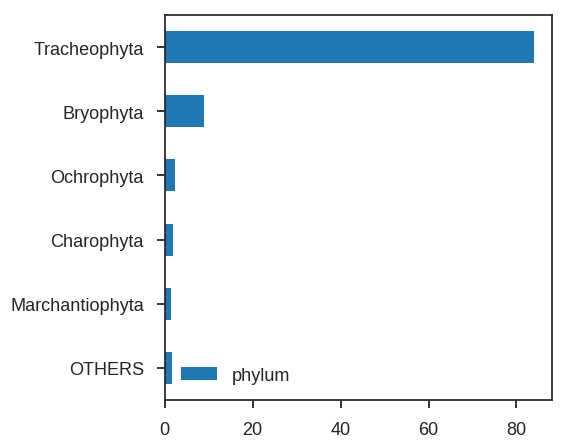

In [558]:
num_records = occs_withFamily.shape[0]
summarize(pd.DataFrame(occs['phylum'].value_counts()/num_records*100),5)[::-1].plot(kind='barh',figsize=(5,5),log=False)


In [567]:
families = pd.DataFrame(occs['family'].value_counts())
families

,family
Fabaceae,19254
Myrtaceae,12833
Asteraceae,11271
Rubiaceae,9447
Cyperaceae,7725
Poaceae,7135
Melastomataceae,6749
Malpighiaceae,4811
Euphorbiaceae,4078
Bignoniaceae,3779


---

## Geographic Characterization

What is the percentage of records with coordinates?

In [213]:
occs['hasCoordinate'].value_counts()

True    185301
Name: hasCoordinate, dtype: int64

All records have coordinates. But how many of them are free of issues?

What is the percentage of records with geospatial issues?

In [203]:
occs['hasGeospatialIssues'].value_counts()

False    96085
True     89216
Name: hasGeospatialIssues, dtype: int64

In [172]:
89216/(96085+89216)

0.4814652916066292

Around 48% of the selected records have some geospatial issues, which were identified during GBIF platform internal preprocessing routines. 
Records where geographical coordinates have been interpreted to have a geospatial issue are tagged and made available to the data user in the `issue` field.
For geospatial issues the user can also consult the `hasGeospatialIssue` field of the dataset, for making it easier to filter out records with geospatial issues.
By inspecting the `issue` field we can verify that most records with geospatial issues are tagged so because a zero latitude and longitude were assigned to it, which is highly likely to be a missing value.

In [420]:
num_geospatial_issues = 89216

In [435]:
from collections import Counter

issues = occs[occs['hasGeospatialIssues']==True]['issue'].apply(lambda x: x.split(';'))
issues = pd.DataFrame.from_dict(Counter( v for values in issues.values for v in values ),orient='index')

In [448]:
geospatial_issues = issues.loc[['ZERO_COORDINATE','COUNTRY_COORDINATE_MISMATCH']]

In [456]:
geospatial_issues['count']=geospatial_issues[0]
geospatial_issues.drop(0,axis=1,inplace=True)
geospatial_issues['pct']=geospatial_issues['count'].apply(lambda x: x/num_geospatial_issues)

In [457]:
geospatial_issues

,count,pct
ZERO_COORDINATE,89109,0.998801
COUNTRY_COORDINATE_MISMATCH,89134,0.999081


In [473]:
issues = occs[occs['hasGeospatialIssues']==True]
print(sum(issues['issue'].apply(lambda x: 'ZERO_COORDINATE' in x and 'COUNTRY_COORDINATE_MISMATCH' in x)))

print(sum(issues['issue'].apply(lambda x: 'ZERO_COORDINATE' in x and 'COUNTRY_COORDINATE_MISMATCH' not in x)))

print(sum(issues['issue'].apply(lambda x: 'ZERO_COORDINATE' not in x and 'COUNTRY_COORDINATE_MISMATCH' in x)))

print(sum(issues['issue'].apply(lambda x: 'ZERO_COORDINATE' not in x and 'COUNTRY_COORDINATE_MISMATCH' not in x)))

89027
82
107
0


In [261]:
occs_w_issues = occs[occs['hasGeospatialIssues']==True]

a = sum(occs_w_issues['issue'].apply(lambda x: 'ZERO_COORDINATE' in x and 'COUNTRY_COORDINATE_MISMATCH' in x))
b = sum(occs_w_issues['issue'].apply(lambda x: 'ZERO_COORDINATE' in x and 'COUNTRY_COORDINATE_MISMATCH' not in x))
c = sum(occs_w_issues['issue'].apply(lambda x: 'ZERO_COORDINATE' not in x and 'COUNTRY_COORDINATE_MISMATCH' in x))
d = sum(occs_w_issues['issue'].apply(lambda x: 'ZERO_COORDINATE' not in x and 'COUNTRY_COORDINATE_MISMATCH' not in x))

In [477]:
occs_w_issues[occs_w_issues['issue'].apply(lambda x: 'ZERO_COORDINATE' in x and 'COUNTRY_COORDINATE_MISMATCH' not in x)]


,recordedBy,occurrenceRemarks,eventDate,stateProvince,municipality,locality,decimalLatitude,decimalLongitude,identifiedBy,scientificName,family,genus,taxonRank,issue,hasCoordinate,hasGeospatialIssues,species
2109,"Triana, J",Tipo. Fotografia do tipo.; .,1892-02-01T01:00Z,NaN,NaN,NaN,0.0,0.0,"Kirkbride Junior, JH",Psychotria aviculoides J.H.Kirkbr.,Rubiaceae,Psychotria,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Psychotria aviculoides
5347,"Gomes Júnior, JC",Frutos equinados.; Rasteira. Flor creme; Cerrado.,1964-02-15T01:00Z,NaN,NaN,Caballero - Fazenda Cerro-Cora,0.0,0.0,"Proença, CEB",Acanthospermum australe (Loefl.) Kuntze,Asteraceae,Acanthospermum,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;I...,True,True,Acanthospermum australe
6280,"Irwin, HS; Souza, R; Santos, RR","Terrestre 0,5m",1965-09-05T01:00Z,NaN,NaN,"Chapada da Contagem, ca. 20 Km NE de Brasília",0.0,0.0,"Dantas-Queiroz, MV",Trimezia juncifolia Klatt,Iridaceae,Trimezia,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84,True,True,Trimezia juncifolia
14014,"Reitz, R; Klein","Erva, flor amarela; Campo",1963-04-15T01:00Z,NaN,NaN,"Painel, Lajes",0.0,0.0,"Teles, AM",Sommerfeldtia spinulosa (Spreng.) Less.,Fabaceae,Sommerfeldtia,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;I...,True,True,Sommerfeldtia spinulosa
24488,"Irwin, HS","Among grasses on steep rocky slope, but mostly...",1964-10-01T01:00Z,NaN,NaN,Ca. 50km S of Caiapônia on road to Jataí,0.0,0.0,"MacLeish, NFF",Pycnocephalum plantaginifolium (Less.) DC.,Asteraceae,Chresta,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;I...,True,True,Chresta plantaginifolia
32138,"Irwin, HS","Shrub, ca. 1.0 m tall. Corolla white, aging to...",1966-06-29T01:00Z,NaN,NaN,"Ca. 30.0 km S of Caiapônia, road to Jataí",0.0,0.0,NaN,Anacardium humile St.-Hil.,Anacardiaceae,Anacardium,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84,True,True,Anacardium humile
44699,Incógnito,NaN,NaN,NaN,NaN,South America,0.0,0.0,NaN,Hypnum scitum P. Beauv.,Thuidiaceae,Rauiella,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Rauiella scita
44772,"Frunstorfer, H",NaN,1895-12-01T01:00Z,NaN,NaN,Celèbes: Bua-Kräng,0.0,0.0,NaN,Thuidium crispatulum Cardot,Thuidiaceae,Thuidiopsis,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Thuidiopsis sparsa
44773,"Bonniel, G",NaN,1977-01-01T01:00Z,NaN,NaN,"Ilhas Reunião, Cilaos",0.0,0.0,NaN,Thuidium matarumense Besch.,Thuidiaceae,Thuidium,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Thuidium assimile
44805,"Wallis, G",NaN,1874-01-01T01:00Z,NaN,NaN,Ocanna,0.0,0.0,NaN,Hypnum frontinoae Müll. Arg.,Hypnaceae,Hypnum,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Hypnum frontinoae


In [ ]:
occs.apply(lambda x: 'Z)

In [46]:
from mpl_toolkits.basemap import Basemap

/home/pedro/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/pedro/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/pedro/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


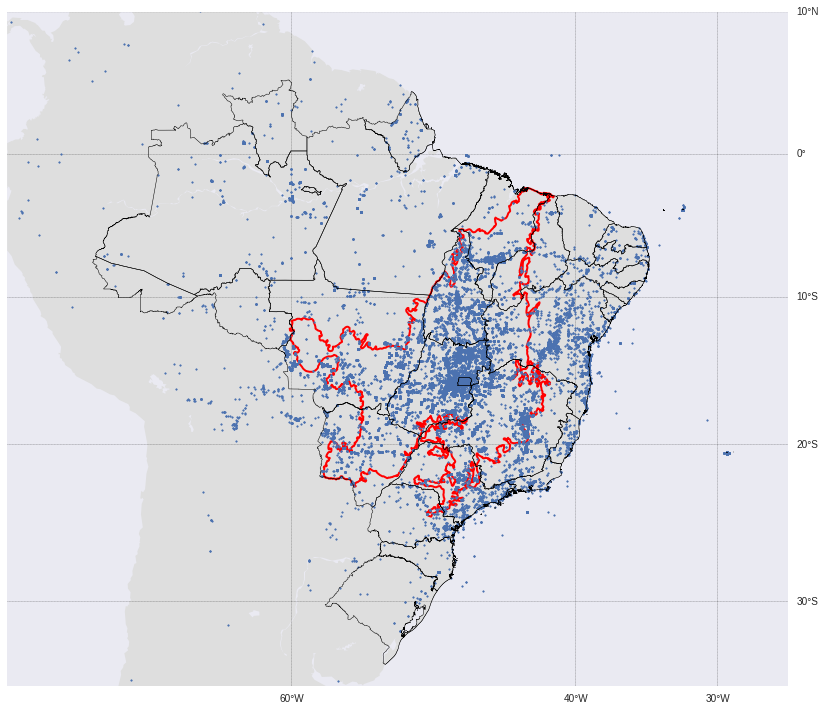

In [419]:
plt.figure(figsize=(14,14))

myMap = Basemap(projection='merc',
                    urcrnrlat=10, urcrnrlon=-25, 
                    llcrnrlat=-35, llcrnrlon=-80,
                    lat_ts=20, resolution='l')

myMap.fillcontinents(color='0.87')
myMap.drawparallels([-60,-40,-30,-20,-10,0,10,20,30],labels=[0,1,0,0],linewidth=0.3)
myMap.drawmeridians([-60,-40,-30], labels=[0,0,0,1],linewidth=0.3)

myMap.readshapefile('../../shapefiles/BRA_adm1', 'states', drawbounds=True, color='0', linewidth=0.5, zorder=10)
myMap.readshapefile('../../shapefiles/biomas2/bioma', 'biomes', drawbounds=False)


for shape,info in zip(myMap.biomes,myMap.biomes_info):
    if info['NOME']=='Cerrado':
        x,y = zip(*shape)
        myMap.plot(x, y, marker=None, color='r',linewidth=2)

records_noissues = occs[occs['hasGeospatialIssues']==False]
records_coords = records_noissues[['decimalLatitude','decimalLongitude']]
x,y = myMap(records_coords['decimalLongitude'].values, records_coords['decimalLatitude'].values)

myMap.plot(x,y,'o', markeredgewidth=0.6, ms=1.5)

plt.savefig('/home/pedro/Downloads/map.png',dpi=192,format='png',bbox_inches='tight')

---

In [9]:
country_codes = {
	'AF': 'AFGHANISTAN',
	'AX': 'ÅLAND ISLANDS',
	'AL': 'ALBANIA',
	'DZ': 'ALGERIA',
	'AS': 'AMERICAN SAMOA',
	'AD': 'ANDORRA',
	'AO': 'ANGOLA',
	'AI': 'ANGUILLA',
	'AQ': 'ANTARCTICA',
	'AG': 'ANTIGUA AND BARBUDA',
	'AR': 'ARGENTINA',
	'AM': 'ARMENIA',
	'AW': 'ARUBA',
	'AU': 'AUSTRALIA',
	'AT': 'AUSTRIA',
	'AZ': 'AZERBAIJAN',
	'BS': 'BAHAMAS',
	'BH': 'BAHRAIN',
	'BD': 'BANGLADESH',
	'BB': 'BARBADOS',
	'BY': 'BELARUS',
	'BE': 'BELGIUM',
	'BZ': 'BELIZE',
	'BJ': 'BENIN',
	'BM': 'BERMUDA',
	'BT': 'BHUTAN',
	'BO': 'BOLIVIA, PLURINATIONAL STATE OF',
	'BQ': 'BONAIRE, SINT EUSTATIUS AND SABA',
	'BA': 'BOSNIA AND HERZEGOVINA',
	'BW': 'BOTSWANA',
	'BV': 'BOUVET ISLAND',
	'BR': 'BRAZIL',
	'IO': 'BRITISH INDIAN OCEAN TERRITORY',
	'BN': 'BRUNEI DARUSSALAM',
	'BG': 'BULGARIA',
	'BF': 'BURKINA FASO',
	'BI': 'BURUNDI',
	'KH': 'CAMBODIA',
	'CM': 'CAMEROON',
	'CA': 'CANADA',
	'CV': 'CAPE VERDE',
	'KY': 'CAYMAN ISLANDS',
	'CF': 'CENTRAL AFRICAN REPUBLIC',
	'TD': 'CHAD',
	'CL': 'CHILE',
	'CN': 'CHINA',
	'CX': 'CHRISTMAS ISLAND',
	'CC': 'COCOS (KEELING) ISLANDS',
	'CO': 'COLOMBIA',
	'KM': 'COMOROS',
	'CG': 'CONGO',
	'CD': 'CONGO, THE DEMOCRATIC REPUBLIC OF THE',
	'CK': 'COOK ISLANDS',
	'CR': 'COSTA RICA',
	'CI': 'CÔTE D\'IVOIRE',
	'HR': 'CROATIA',
	'CU': 'CUBA',
	'CW': 'CURAÇAO',
	'CY': 'CYPRUS',
	'CZ': 'CZECH REPUBLIC',
	'DK': 'DENMARK',
	'DJ': 'DJIBOUTI',
	'DM': 'DOMINICA',
	'DO': 'DOMINICAN REPUBLIC',
	'EC': 'ECUADOR',
	'EG': 'EGYPT',
	'SV': 'EL SALVADOR',
	'GQ': 'EQUATORIAL GUINEA',
	'ER': 'ERITREA',
	'EE': 'ESTONIA',
	'ET': 'ETHIOPIA',
	'FK': 'FALKLAND ISLANDS (MALVINAS)',
	'FO': 'FAROE ISLANDS',
	'FJ': 'FIJI',
	'FI': 'FINLAND',
	'FR': 'FRANCE',
	'GF': 'FRENCH GUIANA',
	'PF': 'FRENCH POLYNESIA',
	'TF': 'FRENCH SOUTHERN TERRITORIES',
	'GA': 'GABON',
	'GM': 'GAMBIA',
	'GE': 'GEORGIA',
	'DE': 'GERMANY',
	'GH': 'GHANA',
	'GI': 'GIBRALTAR',
	'GR': 'GREECE',
	'GL': 'GREENLAND',
	'GD': 'GRENADA',
	'GP': 'GUADELOUPE',
	'GU': 'GUAM',
	'GT': 'GUATEMALA',
	'GG': 'GUERNSEY',
	'GN': 'GUINEA',
	'GW': 'GUINEA-BISSAU',
	'GY': 'GUYANA',
	'HT': 'HAITI',
	'HM': 'HEARD ISLAND AND MCDONALD ISLANDS',
	'VA': 'HOLY SEE (VATICAN CITY STATE)',
	'HN': 'HONDURAS',
	'HK': 'HONG KONG',
	'HU': 'HUNGARY',
	'IS': 'ICELAND',
	'IN': 'INDIA',
	'ID': 'INDONESIA',
	'IR': 'IRAN, ISLAMIC REPUBLIC OF',
	'IQ': 'IRAQ',
	'IE': 'IRELAND',
	'IM': 'ISLE OF MAN',
	'IL': 'ISRAEL',
	'IT': 'ITALY',
	'JM': 'JAMAICA',
	'JP': 'JAPAN',
	'JE': 'JERSEY',
	'JO': 'JORDAN',
	'KZ': 'KAZAKHSTAN',
	'KE': 'KENYA',
	'KI': 'KIRIBATI',
	'KP': 'KOREA, DEMOCRATIC PEOPLE\'S REPUBLIC OF',
	'KR': 'KOREA, REPUBLIC OF',
	'KW': 'KUWAIT',
	'KG': 'KYRGYZSTAN',
	'LA': 'LAO PEOPLE\'S DEMOCRATIC REPUBLIC',
	'LV': 'LATVIA',
	'LB': 'LEBANON',
	'LS': 'LESOTHO',
	'LR': 'LIBERIA',
	'LY': 'LIBYAN ARAB JAMAHIRIYA',
	'LI': 'LIECHTENSTEIN',
	'LT': 'LITHUANIA',
	'LU': 'LUXEMBOURG',
	'MO': 'MACAO',
	'MK': 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF',
	'MG': 'MADAGASCAR',
	'MW': 'MALAWI',
	'MY': 'MALAYSIA',
	'MV': 'MALDIVES',
	'ML': 'MALI',
	'MT': 'MALTA',
	'MH': 'MARSHALL ISLANDS',
	'MQ': 'MARTINIQUE',
	'MR': 'MAURITANIA',
	'MU': 'MAURITIUS',
	'YT': 'MAYOTTE',
	'MX': 'MEXICO',
	'FM': 'MICRONESIA, FEDERATED STATES OF',
	'MD': 'MOLDOVA, REPUBLIC OF',
	'MC': 'MONACO',
	'MN': 'MONGOLIA',
	'ME': 'MONTENEGRO',
	'MS': 'MONTSERRAT',
	'MA': 'MOROCCO',
	'MZ': 'MOZAMBIQUE',
	'MM': 'MYANMAR',
	'NA': 'NAMIBIA',
	'NR': 'NAURU',
	'NP': 'NEPAL',
	'NL': 'NETHERLANDS',
	'NC': 'NEW CALEDONIA',
	'NZ': 'NEW ZEALAND',
	'NI': 'NICARAGUA',
	'NE': 'NIGER',
	'NG': 'NIGERIA',
	'NU': 'NIUE',
	'NF': 'NORFOLK ISLAND',
	'MP': 'NORTHERN MARIANA ISLANDS',
	'NO': 'NORWAY',
	'OM': 'OMAN',
	'PK': 'PAKISTAN',
	'PW': 'PALAU',
	'PS': 'PALESTINIAN TERRITORY, OCCUPIED',
	'PA': 'PANAMA',
	'PG': 'PAPUA NEW GUINEA',
	'PY': 'PARAGUAY',
	'PE': 'PERU',
	'PH': 'PHILIPPINES',
	'PN': 'PITCAIRN',
	'PL': 'POLAND',
	'PT': 'PORTUGAL',
	'PR': 'PUERTO RICO',
	'QA': 'QATAR',
	'RE': 'RÉUNION',
	'RO': 'ROMANIA',
	'RU': 'RUSSIAN FEDERATION',
	'RW': 'RWANDA',
	'BL': 'SAINT BARTHÉLEMY',
	'SH': 'SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA',
	'KN': 'SAINT KITTS AND NEVIS',
	'LC': 'SAINT LUCIA',
	'MF': 'SAINT MARTIN (FRENCH PART)',
	'PM': 'SAINT PIERRE AND MIQUELON',
	'VC': 'SAINT VINCENT AND THE GRENADINES',
	'WS': 'SAMOA',
	'SM': 'SAN MARINO',
	'ST': 'SAO TOME AND PRINCIPE',
	'SA': 'SAUDI ARABIA',
	'SN': 'SENEGAL',
	'RS': 'SERBIA',
	'SC': 'SEYCHELLES',
	'SL': 'SIERRA LEONE',
	'SG': 'SINGAPORE',
	'SX': 'SINT MAARTEN (DUTCH PART)',
	'SK': 'SLOVAKIA',
	'SI': 'SLOVENIA',
	'SB': 'SOLOMON ISLANDS',
	'SO': 'SOMALIA',
	'ZA': 'SOUTH AFRICA',
	'GS': 'SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS',
	'SS': 'SOUTH SUDAN',
	'ES': 'SPAIN',
	'LK': 'SRI LANKA',
	'SD': 'SUDAN',
	'SR': 'SURINAME',
	'SJ': 'SVALBARD AND JAN MAYEN',
	'SZ': 'SWAZILAND',
	'SE': 'SWEDEN',
	'CH': 'SWITZERLAND',
	'SY': 'SYRIAN ARAB REPUBLIC',
	'TW': 'TAIWAN, PROVINCE OF CHINA',
	'TJ': 'TAJIKISTAN',
	'TZ': 'TANZANIA, UNITED REPUBLIC OF',
	'TH': 'THAILAND',
	'TL': 'TIMOR-LESTE',
	'TG': 'TOGO',
	'TK': 'TOKELAU',
	'TO': 'TONGA',
	'TT': 'TRINIDAD AND TOBAGO',
	'TN': 'TUNISIA',
	'TR': 'TURKEY',
	'TM': 'TURKMENISTAN',
	'TC': 'TURKS AND CAICOS ISLANDS',
	'TV': 'TUVALU',
	'UG': 'UGANDA',
	'UA': 'UKRAINE',
	'AE': 'UNITED ARAB EMIRATES',
	'GB': 'UNITED KINGDOM',
	'US': 'UNITED STATES',
	'UM': 'UNITED STATES MINOR OUTLYING ISLANDS',
	'UY': 'URUGUAY',
	'UZ': 'UZBEKISTAN',
	'VU': 'VANUATU',
	'VE': 'VENEZUELA, BOLIVARIAN REPUBLIC OF',
	'VN': 'VIET NAM',
	'VG': 'VIRGIN ISLANDS, BRITISH',
	'VI': 'VIRGIN ISLANDS, U.S.',
	'WF': 'WALLIS AND FUTUNA',
	'EH': 'WESTERN SAHARA',
	'YE': 'YEMEN',
	'ZM': 'ZAMBIA',
	'ZW': 'ZIMBABWE',
    'ZZ': 'UNKNOWN'
}

In [12]:
plt.style.available

['seaborn-deep',
 'seaborn-talk',
 '_classic_test',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-notebook',
 'bmh',
 'seaborn-poster',
 'fast',
 'seaborn-white',
 'grayscale',
 'seaborn-whitegrid',
 'seaborn-bright',
 'fivethirtyeight',
 'seaborn-dark-palette',
 'seaborn-dark',
 'classic',
 'ggplot',
 'seaborn',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'dark_background',
 'seaborn-colorblind',
 'Solarize_Light2']

In [121]:
def summarize(df,limit=10):
    top = df.iloc[:limit]
    others = df.iloc[limit:]
    
    others=others.sum()
    others.name='OTHERS'
        
    top = top.append(others)
    return top

In [108]:
occs_br = occs[occs['countryCode']=='BR']

In [137]:
states_counts = pd.DataFrame(occs_br['stateProvince'].value_counts())
states_counts['cnt'] = states_counts['stateProvince']
states_counts.drop('stateProvince',axis=1, inplace=True)

country_counts = pd.DataFrame(occs['countryCode'].value_counts())
country_counts.index = country_counts.index.map(lambda x: country_codes[x])
country_counts['cnt']=country_counts['countryCode']
country_counts.drop('countryCode', axis=1, inplace=True)

states_counts = summarize(states_counts)
country_counts = summarize(country_counts)

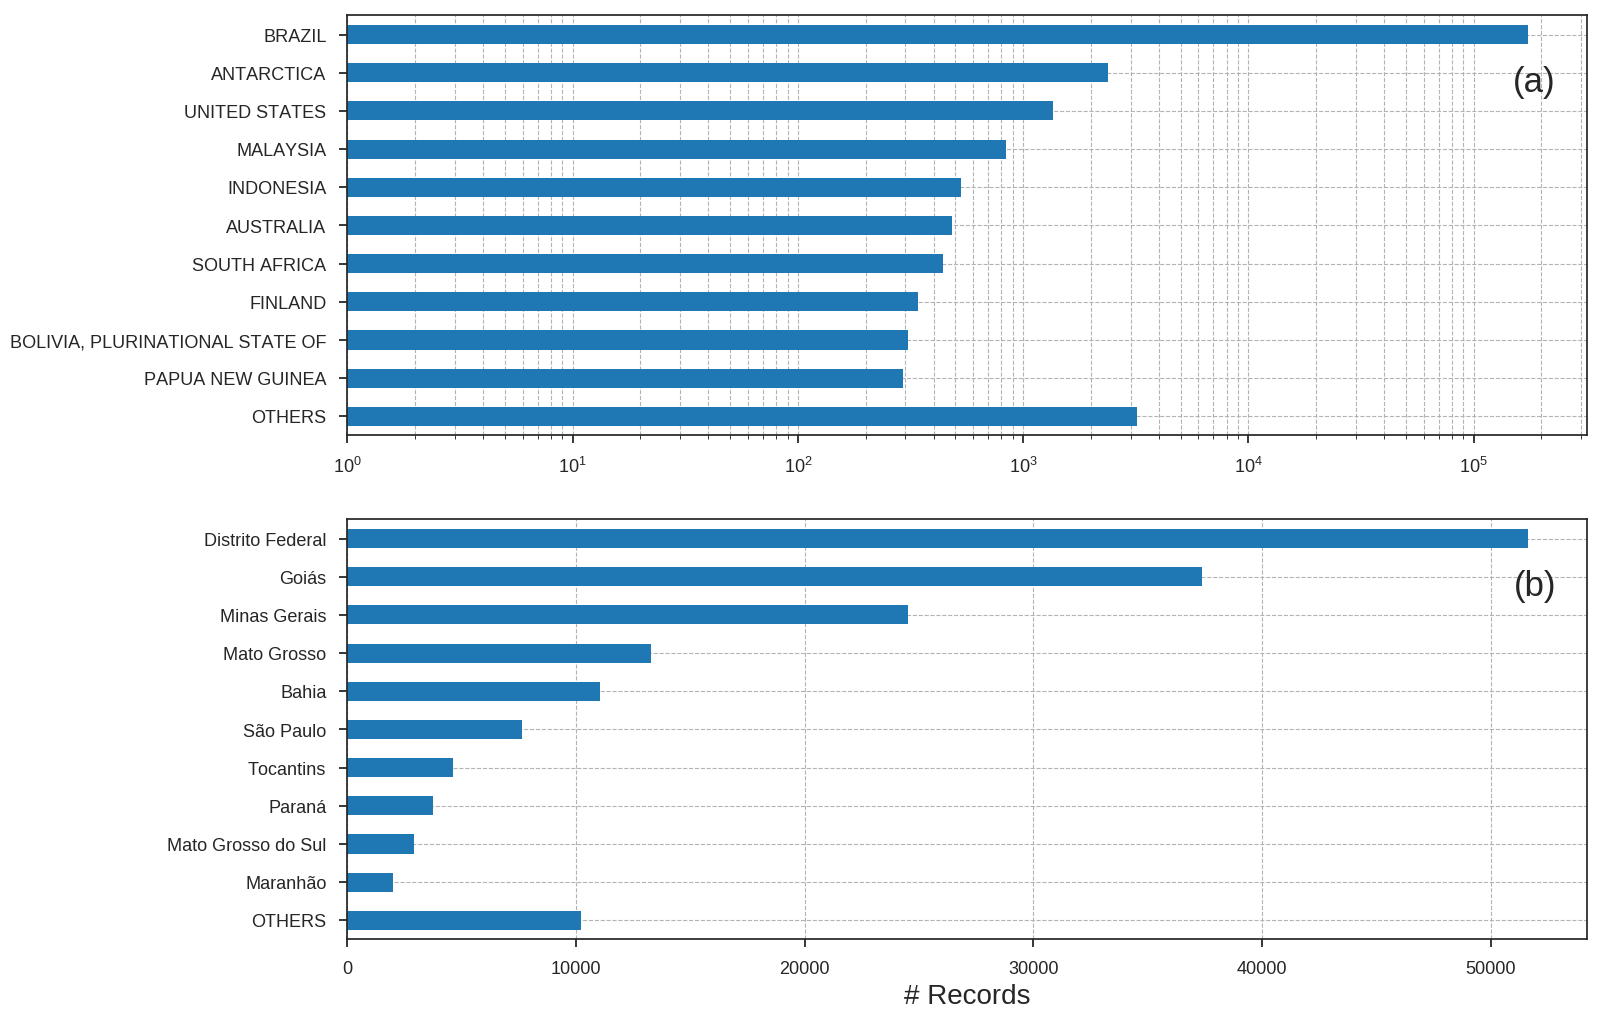

In [210]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('seaborn-ticks')
sns.set_context('talk')

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(16,12))

country_counts[::-1].plot(kind='barh',ax=ax1,log=True,legend=False)
states_counts[::-1].plot(kind='barh',ax=ax2,legend=False)
ax1.grid(which='both',ls='--',lw=0.8,color='0.7')
ax2.grid(which='both',ls='--',lw=0.8,color='0.7')

ax2.set_xlabel("# Records",size=20)

ax1.text(1.5e5,8.5, '(a)', size=25)
ax2.text(5.1e4,8.5, '(b)', size=25)

plt.savefig('/home/pedro/Downloads/recs_by_cntry_state.png',dpi=192,format='png',bbox_inches='tight')

### Temporal distribution

In [322]:
occs_ts = occs.set_index(pd.to_datetime(occs['eventDate']))
occs_ts.sort_index(inplace=True)

How many records per year?

In [323]:
recs_per_year = occs_ts['scientificName'].resample('AS').count()

Cumulative count

In [324]:
cntr = 0
l=[]
for year,count in recs_per_year.items():
    cntr+=count
    l.append((year,cntr))
    
cumcount = pd.DataFrame.from_records(l, columns=['Year','Cumulative Count'])
cumcount.set_index('Year',inplace=True)

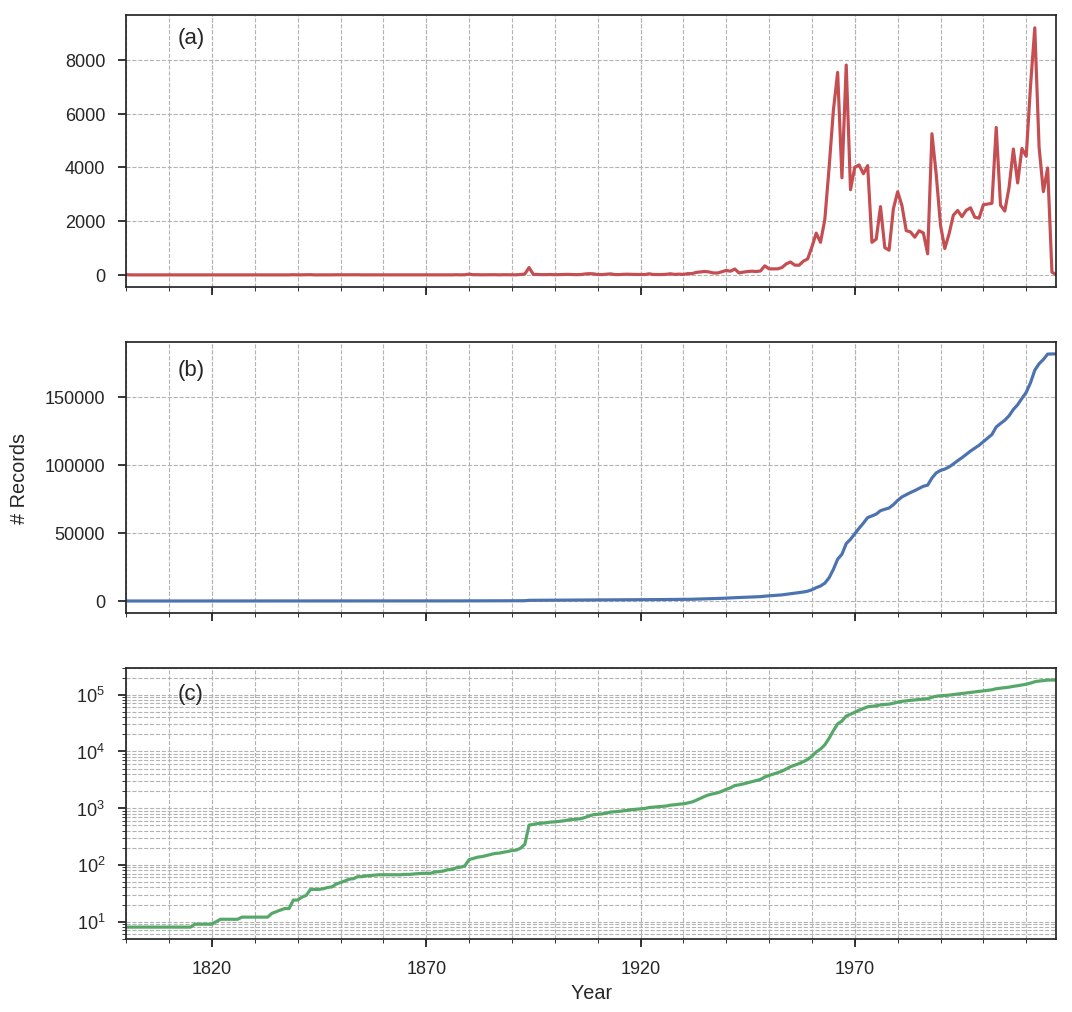

In [908]:
maxYear = max(cumcount.index)
minYear = min(cumcount.index)
sns.set_color_codes('deep')

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,12),sharex=True)

recs_per_year.plot(kind='line',ax=ax1,logy=False,legend=False, color='r')
cumcount.plot(kind='line',ax=ax2,logy=False,legend=False, color='b')
cumcount.plot(kind='line',ax=ax3,logy=True,legend=False, color='g')

ax1.grid(which='both',ls='--',lw=0.8,color='0.7')
ax2.grid(which='both',ls='--',lw=0.8,color='0.7')
ax3.grid(which='both',ls='--',lw=0.8,color='0.7')

ax0 = fig.add_subplot(111,frame_on=False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_ylabel('# Records', labelpad=70)
ax0.text(0.055,0.97, '(a)', size=16)
ax0.text(0.055,0.61, '(b)', size=16)
ax0.text(0.055,0.26, '(c)', size=16)

plt.savefig('/home/pedro/Downloads/ub_records_timeseries.png',dpi=192,format='png',bbox_inches='tight')

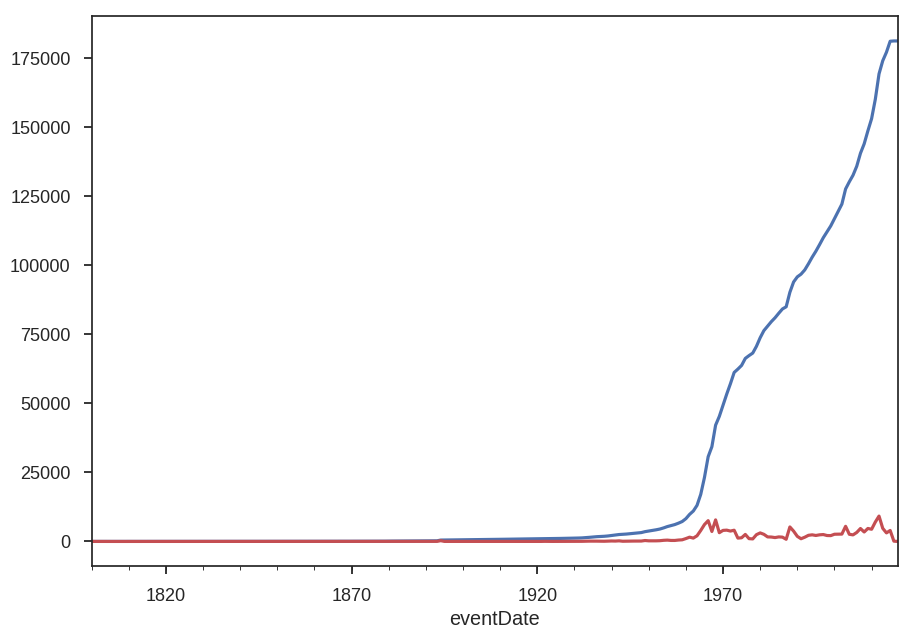

In [843]:
fig = cumcount.plot(kind='line',logy=False,legend=False, color='b')
recs_per_year.plot(kind='line',logy=False,legend=False, color='r')


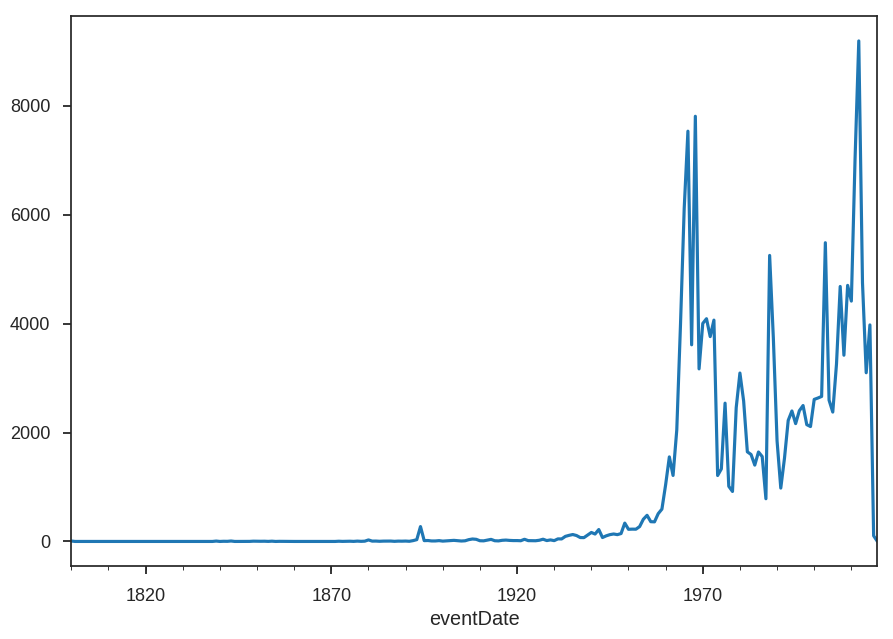

In [439]:
recs_per_year.plot()

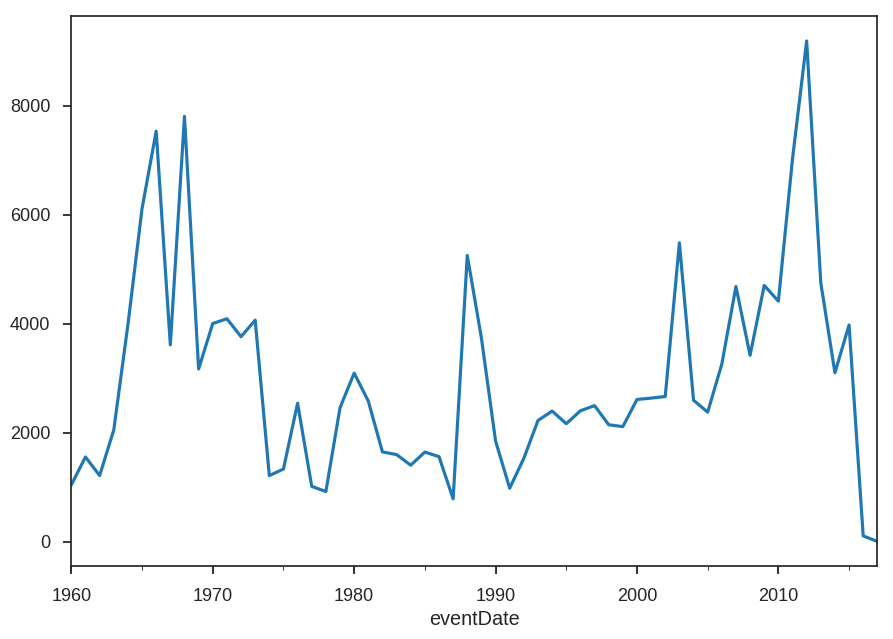

In [449]:
recs_per_year['1960':].plot()

In [447]:
sum(occs_ts.index.notnull())/len(occs_ts.index)

0.97815985882429124

In [446]:
occs_ts[:'1900']

,recordedBy,occurrenceRemarks,eventDate,countryCode,stateProvince,municipality,locality,decimalLatitude,decimalLongitude,identifiedBy,scientificName,family,genus,taxonRank,issue,hasCoordinate,hasGeospatialIssues,species
eventDate,,,,,,,,,,,,,,,,,,
1800-01-01 01:00:00,?,Tipo. Fotografia do tipo.; .,1800-01-01T01:00Z,ZZ,NaN,NaN,NaN,0.0,0.0,Incógnito,Psychotria iodotricha Müll.Arg.,Rubiaceae,Psychotria,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Psychotria iodotricha
1800-03-01 01:00:00,"Gardner, G",Tipo. Fotografia do tipo.; 6ft; Margem de cach...,1800-03-01T01:00Z,BR,NaN,NaN,NaN,0.0,0.0,"Gardner, G",Faramea caudata Gardner,Rubiaceae,Faramea,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Faramea caudata
1800-04-01 01:00:00,"Spruce, R",Tipo. Fotografia do tipo.; Flor branca; . Solo...,1800-04-01T01:00Z,BR,Pará,Santarém,NaN,0.0,0.0,Incógnito,Borreria G. Mey.,Rubiaceae,Spermacoce,GENUS,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,NaN
1800-06-01 01:00:00,"Spruce, R",Tipo. Fotografia do tipo.; .,1800-06-01T01:00Z,ZZ,NaN,NaN,NaN,0.0,0.0,Incógnito,Henriquezia obovata Spruce ex Benth.,Rubiaceae,Henriquezia,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Henriquezia verticillata
1800-06-01 01:00:00,"Spruce, R","Tipo. Fotografia do tipo.; Árvore 0,2mpd. Flor...",1800-06-01T01:00Z,ZZ,NaN,NaN,NaN,0.0,0.0,Incógnito,Ladenbergia graciliflora K.Schum.,Rubiaceae,Ladenbergia,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Ladenbergia graciliflora
1800-09-01 01:00:00,"Sandwith, NY",Tipo. Fotografia do tipo.; Arbusto. Flor branc...,1800-09-01T01:00Z,GY,NaN,NaN,Rio Potaro,0.0,0.0,Incógnito,Psychotria kaieteurensis Sandwith,Rubiaceae,Psychotria,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Psychotria kaieteurensis
1800-09-01 01:00:00,"Sandwith, NY",Tipo. Fotografia do tipo.; Arbusto; Floresta.,1800-09-01T01:00Z,GY,NaN,NaN,Kaieteur savannah,0.0,0.0,Incógnito,Psychotria crocochlamys Sandwith,Rubiaceae,Psychotria,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Psychotria crocochlamys
1800-10-01 01:00:00,"Spruce, R","Tipo. Fotografia do tipo.; Árvore 0,3ft. Flor ...",1800-10-01T01:00Z,BR,NaN,NaN,NaN,0.0,0.0,Incógnito,Ixora panurensis Müll.Arg.,Rubiaceae,Ixora,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Ixora panurensis
1816-01-01 01:00:00,"Saint-Hilaire, A",NaN,1816-01-01T01:00Z,BR,NaN,NaN,NaN,0.0,0.0,"Kirkbride Junior, JH",Staelia virgata (Link ex Roem. & Schult.) K.Sc...,Rubiaceae,Staelia,SPECIES,ZERO_COORDINATE;GEODETIC_DATUM_ASSUMED_WGS84;C...,True,True,Staelia virgata


DatetimeIndex(['1800-01-01', '1816-01-01', '1821-01-01', '1822-01-01',
               '1827-01-01', '1834-01-01', '1835-01-01', '1836-01-01',
               '1837-01-01', '1839-01-01',
               ...
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name=0, length=176, freq=None)

In [103]:
occs_ts['2016']

,recordedBy,occurrenceRemarks,eventDate,stateProvince,municipality,locality,identifiedBy,scientificName,family,genus,taxonRank,species
eventDate,,,,,,,,,,,,
2016-01-02 01:00:00,"Faria, JEQ",Erva cespitosa 1m; espiguetas verdes; Cerrado ...,2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...",NaN,Paspalum L.,Poaceae,Paspalum,GENUS,NaN
2016-01-02 01:00:00,"Faria, JEQ","Subarbusto ca. 0,8 m de altura, frutos imaturo...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...","Faria, JEQ",Psidium luridum (Spreng.) Burret,Myrtaceae,Psidium,SPECIES,Psidium salutare
2016-01-02 01:00:00,"Faria, JEQ","Erva ca. 0,4 m de altura, espiguetas castanhas...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...",NaN,Cyperaceae,Cyperaceae,NaN,FAMILY,NaN
2016-01-02 01:00:00,"Faria, JEQ","Erva ca. 0,2 m de altura, espiguetas castanhas...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...",NaN,Cyperaceae,Cyperaceae,NaN,FAMILY,NaN
2016-01-02 01:00:00,"Faria, JEQ","Arvoreta ca. 3 m de altura, botões florais ver...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...","Faria, JEQ",Ferdinandusa elliptica (Pohl) Pohl,Rubiaceae,Ferdinandusa,SPECIES,Ferdinandusa elliptica
2016-01-02 01:00:00,"Faria, JEQ","Árvore ca. 12 m de altura, frutos imaturos ver...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...","Proença, C",Priogymnanthus hasslerianus (Chodat) P.S.Green,Oleaceae,Priogymnanthus,SPECIES,Priogymnanthus hasslerianus
2016-01-02 01:00:00,"Faria, JEQ","Subarbusto ca. 0,3 m de altura, flores rosas; ...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...","Facco, MG",Cuphea spermacoce St.-Hil.,Lythraceae,Cuphea,SPECIES,Cuphea spermacoce
2016-01-02 01:00:00,"Faria, JEQ","Árvore ca. 4 m de altura, frutos imaturos verd...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...",NaN,Psidium hians Mart. ex DC.,Myrtaceae,Campomanesia,SPECIES,Campomanesia pubescens
2016-01-02 01:00:00,"Faria, JEQ","Subarbusto ca. 0,25 m de altura, flores amarel...",2016-01-02T01:00Z,Goiás,Alto Horizonte,"Região da Sururuca, fazenda Cajás, proprietári...",NaN,Camarea A. St.-Hil.,Malpighiaceae,Camarea,GENUS,NaN


In [51]:
occs_ts['1947']

,recordedBy,occurrenceRemarks,eventDate,stateProvince,municipality,locality,identifiedBy,scientificName,family,genus,taxonRank,species
eventDate,,,,,,,,,,,,
1947-01-01 01:00:00,"Pires, JM",NaN,1947-01-01T01:00Z,Pará,NaN,"Tomé-açú, Rio pequeno, afluente do Rio Acará.",Incógnito,Lacunaria jenmanii (Oliv.) Ducke,Quiinaceae,Lacunaria,SPECIES,Lacunaria jenmanii
1947-01-01 01:00:00,"Stokoe, TP",NaN,1947-01-01T01:00Z,NaN,NaN,"Swartberg Pass, Prince Albert area","Câmara, PEAS",Sematophyllum gueinzii (Hampe) Magill,Sematophyllaceae,Sematophyllum,SPECIES,Sematophyllum gueinzii
1947-01-01 01:00:00,"Pires, JM",NaN,1947-01-01T01:00Z,Pará,NaN,"Tomé-açú, Rio pequeno, afluente do Rio Acará.",Incógnito,Lacunaria jenmanii (Oliv.) Ducke,Quiinaceae,Lacunaria,SPECIES,Lacunaria jenmanii
1947-01-11 01:00:00,"Risso, JL","Plan ""Genera et Species Plantarum Argentinarum.",1947-01-11T01:00Z,Catamarca,NaN,Villa Santo Domingo. Los Angeles. Dep. Capayán,NaN,Oxalis L.,Oxalidaceae,Oxalis,GENUS,NaN
1947-01-13 01:00:00,"Malvarez, MR",NaN,1947-01-13T01:00Z,Salta,Salta,Dep. Anta. General Pizarro.,NaN,Oxalis L.,Oxalidaceae,Oxalis,GENUS,NaN
1947-01-14 01:00:00,"Hoehne, W","Slender shrub 0,3m tall.",1947-01-14T01:00Z,São Paulo,NaN,Próximo a São Miguel.,NaN,Chaetostoma pungens DC.,Melastomataceae,Chaetostoma,SPECIES,Chaetostoma armatum
1947-01-15 01:00:00,"Malvárez, R","Plan ""Genera et Species Plantarum Argentinarum.",1947-01-15T01:00Z,Salta,Salta,Dep. Anta. General Mollinedo.,NaN,Oxalis erosa Knuth,Oxalidaceae,Oxalis,SPECIES,Oxalis erosa
1947-01-19 01:00:00,"Borsini, OH","Plan ""Genera et Species Plantarum Argentinarum.",1947-01-19T01:00Z,Tucumán,NaN,"Dep. Burruyacú. Estância Los pinos, Rodeo de l...",NaN,Oxalis L.,Oxalidaceae,Oxalis,GENUS,NaN
1947-01-20 01:00:00,"Clover, EU",NaN,1947-01-20T01:00Z,NaN,NaN,High hill E of Jalapa,"Allen, BH",Sematophyllum Mitt.,Sematophyllaceae,Sematophyllum,GENUS,NaN
